<a href="https://colab.research.google.com/github/ShashiBhushanRaj/AI-ML/blob/main/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [5]:
# loading dataset from sklearn
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=50)


In [6]:
faces.data.shape

(1560, 2914)

In [7]:
faces.images[0].shape

(62, 47)

In [8]:
62*47

2914

In [9]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [12]:
# Distinct Classes
faces.target_names.size

12

In [13]:
np.unique(faces.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [15]:
faces.target_names[0]

np.str_('Ariel Sharon')

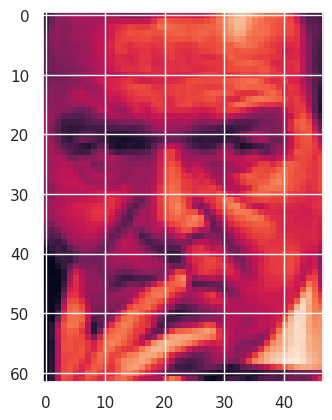

In [16]:
plt.imshow(faces.images[1])

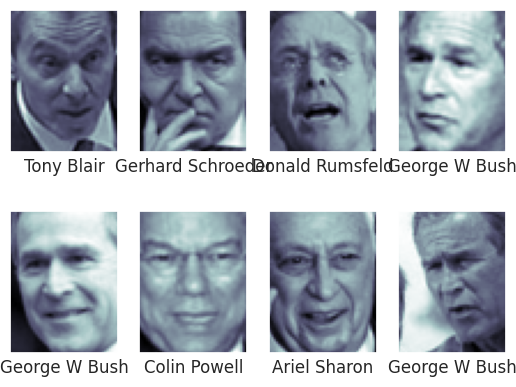

In [50]:
# Plotting a 2x4 grid of sample face images from the LFW dataset.
# Each subplot shows one grayscale face image with the corresponding person's name as the label.
# xticks and yticks are removed for a cleaner visual presentation.

fig,ax=plt.subplots(2,4)
for idx,axidx in enumerate(ax.flat):
  axidx.imshow(faces.images[idx],cmap='bone')
  axidx.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[idx]])

In [20]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [24]:
# model selection
pcaModel=PCA(n_components=150,whiten=True)
svmModel=SVC(kernel='rbf',class_weight='balanced')
mdl=make_pipeline(pcaModel,svmModel)

In [25]:
# splitting of the training and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(faces.data,faces.target,test_size=0.2)

In [51]:
# Performing hyperparameter tuning using GridSearchCV to find the best values of C and gamma for the SVM model

from sklearn.model_selection import GridSearchCV
param_grid={'svc__C':[1,5,15,30],'svc__gamma':[0.00001,0.000005,.00001,0.005]}
grid=GridSearchCV(mdl,param_grid)

In [36]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 15, 30],
                         'svc__gamma': [1e-05, 5e-06, 1e-05, 0.005]})

In [37]:
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.005}


In [38]:
mdl=grid.best_estimator_

In [39]:
y_pred=mdl.predict(xtest)


In [40]:
ytest

array([ 2,  3,  3,  4,  3,  0,  3,  3,  2,  3,  6,  5,  0,  1, 11,  1,  4,
       11,  1,  3, 10,  2,  3, 11,  8,  4,  4,  1,  7,  3,  3,  7,  1,  8,
       11,  0,  3,  1,  3,  3,  1,  3,  8,  1,  5,  3,  0,  5,  9, 11,  5,
        1,  3,  3,  6, 10, 11,  1,  3,  2,  3,  1,  9,  3,  3, 11,  2,  3,
        8,  3, 11, 11,  3,  3,  7,  3,  9,  2,  3,  5,  1, 11,  3,  6,  3,
        2,  0,  3, 10,  3,  3,  4,  3,  3,  5,  1,  3, 11,  4,  1,  3,  3,
        1,  3,  1,  3,  5,  1,  4, 11, 10,  3,  5,  3,  1,  3,  3, 10,  3,
        3,  7,  3,  3,  3,  3,  0,  3,  0,  8,  2,  2,  7, 11,  3,  3,  3,
        3,  0,  2,  2,  3,  9,  3, 10,  1,  3,  3,  4,  3,  3,  4,  2,  3,
        2,  1,  0,  2,  3,  2,  3,  3,  3,  4,  8,  3,  9,  2, 11,  9,  4,
        5,  1,  3,  1, 11,  8,  3,  3,  6,  3,  3,  6,  3,  0,  3,  7,  3,
        6,  3,  1,  3, 11,  4,  3, 10,  3, 11,  0,  2,  6,  1, 11,  1,  2,
       11,  1,  1,  3,  3,  4,  5,  2,  3,  1,  4,  0,  3,  6,  0,  5,  1,
        1,  0,  3, 11,  1

In [41]:
y_pred

array([ 2,  3,  3,  3,  3,  1,  3,  3,  2,  3,  3,  5,  3,  1, 11,  1,  3,
       11,  1,  3,  1,  2,  3, 11,  3,  4,  1,  1,  7,  3,  3,  1,  1,  3,
       11,  0,  3,  1,  3,  3,  1,  3,  8,  1,  1,  3,  0,  5,  9,  1,  5,
        1,  3,  3,  6,  3, 11,  1,  3, 11,  3,  1,  9,  3,  3, 11,  1,  3,
        3,  3, 11,  3,  3,  3,  7,  3,  9,  2,  3,  5,  1, 11,  3, 11,  3,
        1,  0,  3,  3,  3,  3,  4,  3,  3,  5,  1,  3,  1,  4,  1,  3,  3,
        1,  3,  1,  3,  5, 11,  4, 11, 10,  3,  5,  3,  1,  3,  3, 10,  3,
        3,  7,  3,  3,  3,  3,  0,  3,  0,  4,  2,  3,  7, 11,  3,  3,  1,
        3,  0,  2,  2,  3,  3,  3, 10,  1,  3,  3,  4,  3,  3,  3,  2,  3,
        1,  1,  0,  2,  3,  3,  3,  3,  3,  3,  8,  1,  9, 11, 11,  9,  4,
        5,  1,  3,  3, 11,  8,  3,  3,  3,  3,  3,  6,  3,  1,  3,  7,  3,
        6,  3,  1,  3, 11,  4,  3,  1,  3, 11, 10,  2,  1,  1, 11,  1,  1,
       11,  1,  1,  3,  3,  4,  5,  2,  3,  1,  4,  1,  3,  1,  0,  5,  1,
        1,  0,  3, 11,  1

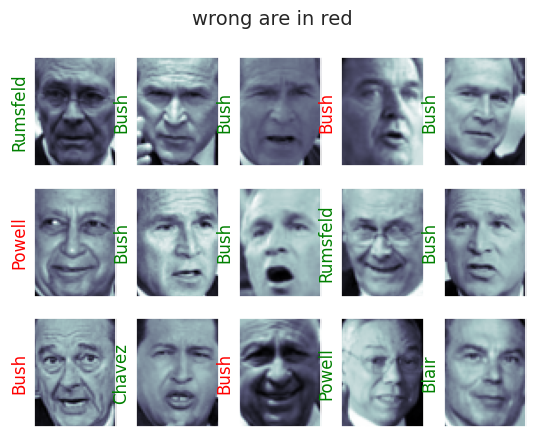

In [52]:
# Visualizing test images with predicted last names (green=correct, red=wrong)

fig,ax=plt.subplots(3,5)
for idx,axidx in enumerate(ax.flat):
  axidx.imshow(xtest[idx].reshape(62,47),cmap='bone')
  axidx.set(xticks=[],yticks=[])
  axidx.set_ylabel(faces.target_names[y_pred[idx]].split()[-1],color='green' if y_pred[idx]==ytest[idx] else 'red')
  fig.suptitle('wrong are in red',size=14)

In [46]:
from sklearn.metrics import classification_report


In [47]:
print(classification_report(ytest,y_pred,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.92      0.60      0.73        20
     Colin Powell       0.65      0.93      0.76        43
  Donald Rumsfeld       0.88      0.60      0.71        25
    George W Bush       0.82      0.96      0.89       114
Gerhard Schroeder       0.92      0.69      0.79        16
      Hugo Chavez       1.00      0.93      0.97        15
   Jacques Chirac       1.00      0.33      0.50        12
    Jean Chretien       0.88      0.78      0.82         9
    John Ashcroft       1.00      0.40      0.57        10
Junichiro Koizumi       1.00      0.86      0.92         7
  Serena Williams       0.83      0.56      0.67         9
       Tony Blair       0.81      0.81      0.81        32

         accuracy                           0.81       312
        macro avg       0.89      0.70      0.76       312
     weighted avg       0.84      0.81      0.80       312



<Axes: >

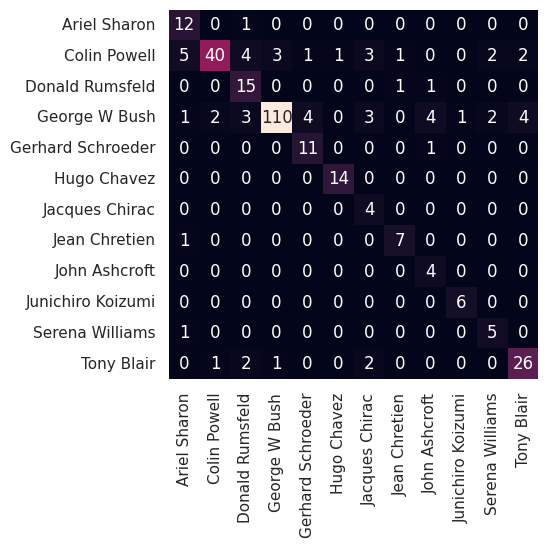

In [49]:
# confusion matrix
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(ytest,y_pred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=faces.target_names,yticklabels=faces.target_names)